# THE SPARKS FOUNDATION

# Task 5 : Exploratory Data Analysis -Sports

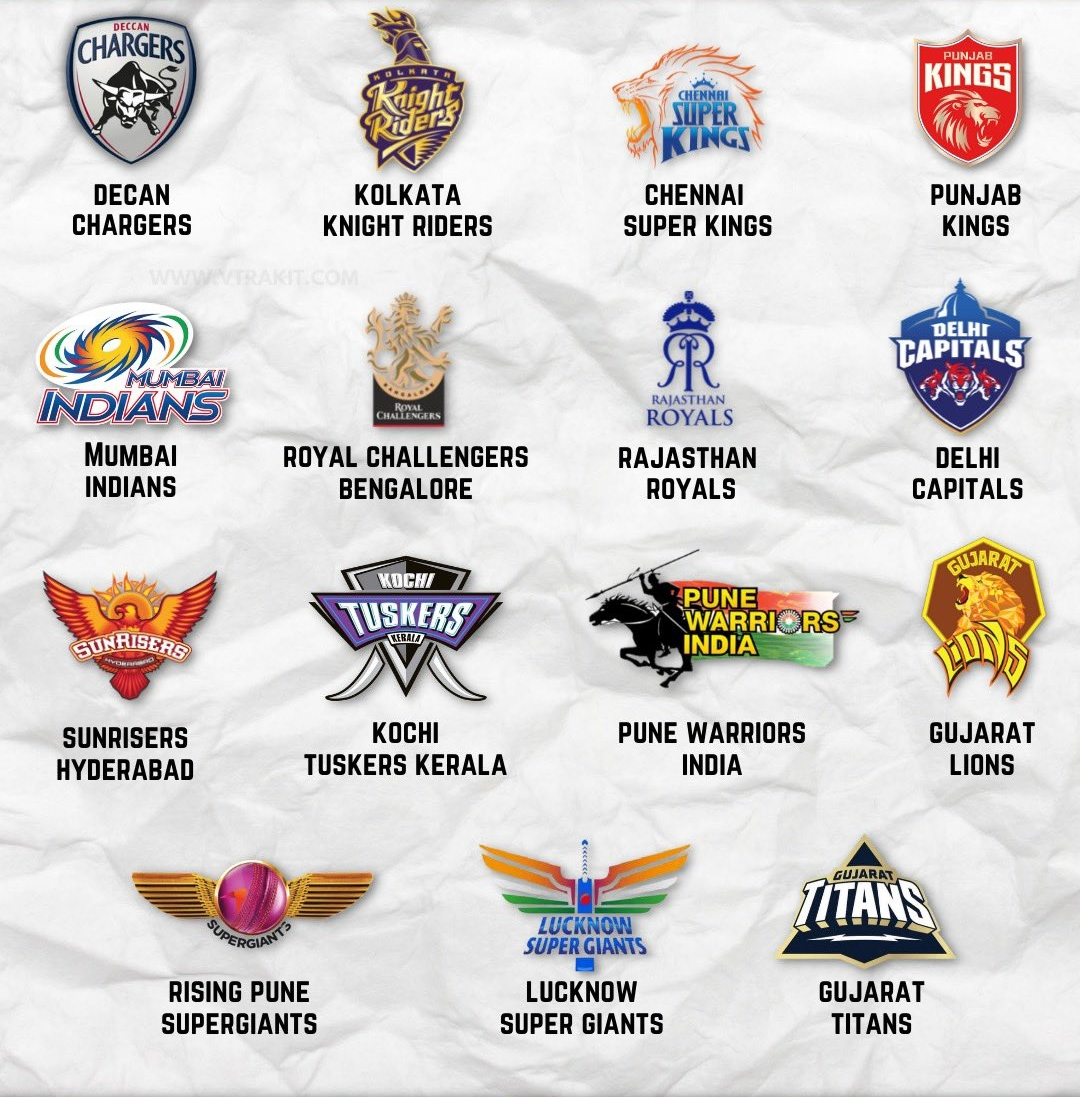


![](https://bcciplayerimages.s3.ap-south-1.amazonaws.com/ipl/IPLHeadshot2023/57.png)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import  plot, iplot

In [2]:
matches_df = pd.read_csv("matches_.csv")
score_df = pd.read_csv("deliveries_.csv")

In [3]:
matches_df.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
score_df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

# DATA INFORMATION

In [5]:
print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
print(matches_df.isnull().sum())
print(score_df.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype:

In [7]:
# Seasons we have got in the dataset

matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [8]:
#we can see here "Rising Pune Supergiant" and "Rising Pune Supergiants" is taken as different teams
print(matches_df['winner'].unique())
#Bengalore and Bengaluru is taken as two different cities
print(matches_df['city'].unique())
#same case with venue
print(matches_df['venue'].unique())


['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan 'Rising Pune Supergiants' 'Delhi Capitals']
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cric

In [9]:
#we need data cleaning
matches_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_df.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)
matches_df.replace('Bangalore','Bengaluru', inplace = True)

In [10]:
## Team won by Maximum Runs

matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [11]:
## Team won by Maximum Wickets

matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [12]:
## Team won by minimum runs

matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [13]:
## Team won by Minimum Wickets

matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

## Observation :

>  1) Mumbai Indians is the team which won by maximum and minimum runs

>  2) Kolkata Knight Riders is the team which won by maximum and minimum wickets

## Season Which had most number of matches

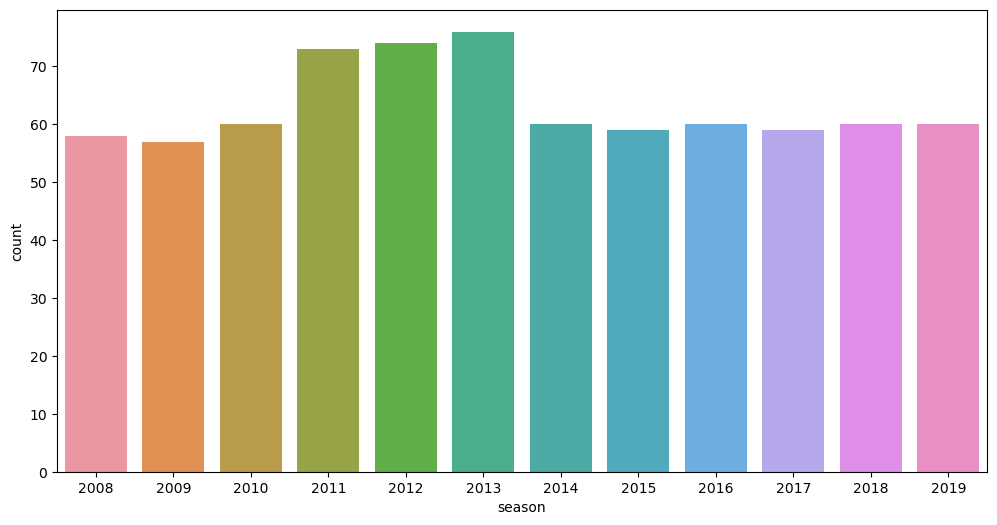

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches_df)
plt.show()

 In 2013, we have the most number of matches

#  Total number of matches Win by Each Teams

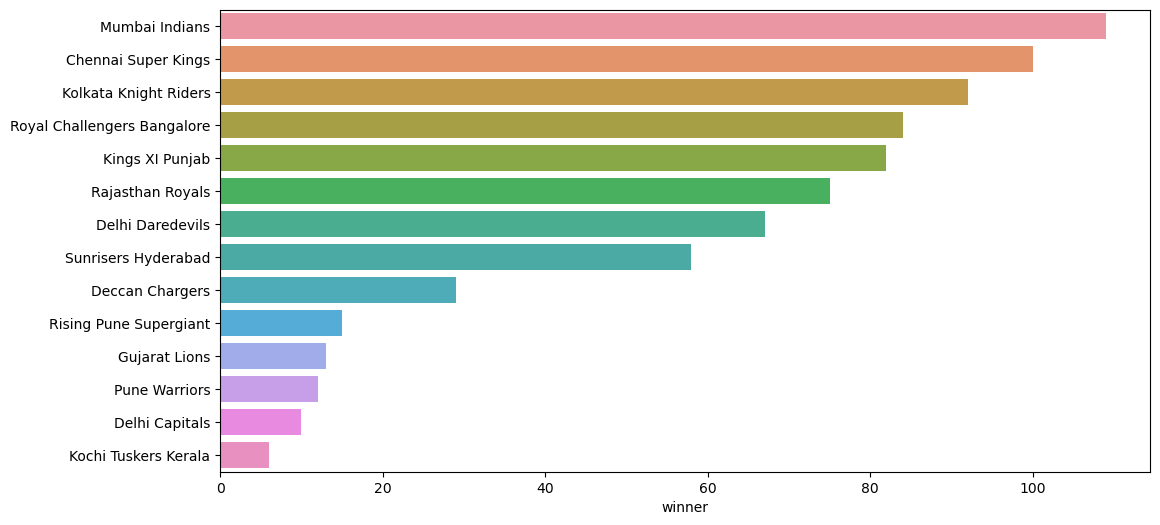

In [15]:
plt.figure(figsize=(12,6))
data = matches_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

Mumbai Indians are the winners in most of the matches

## Top Player of the match winners

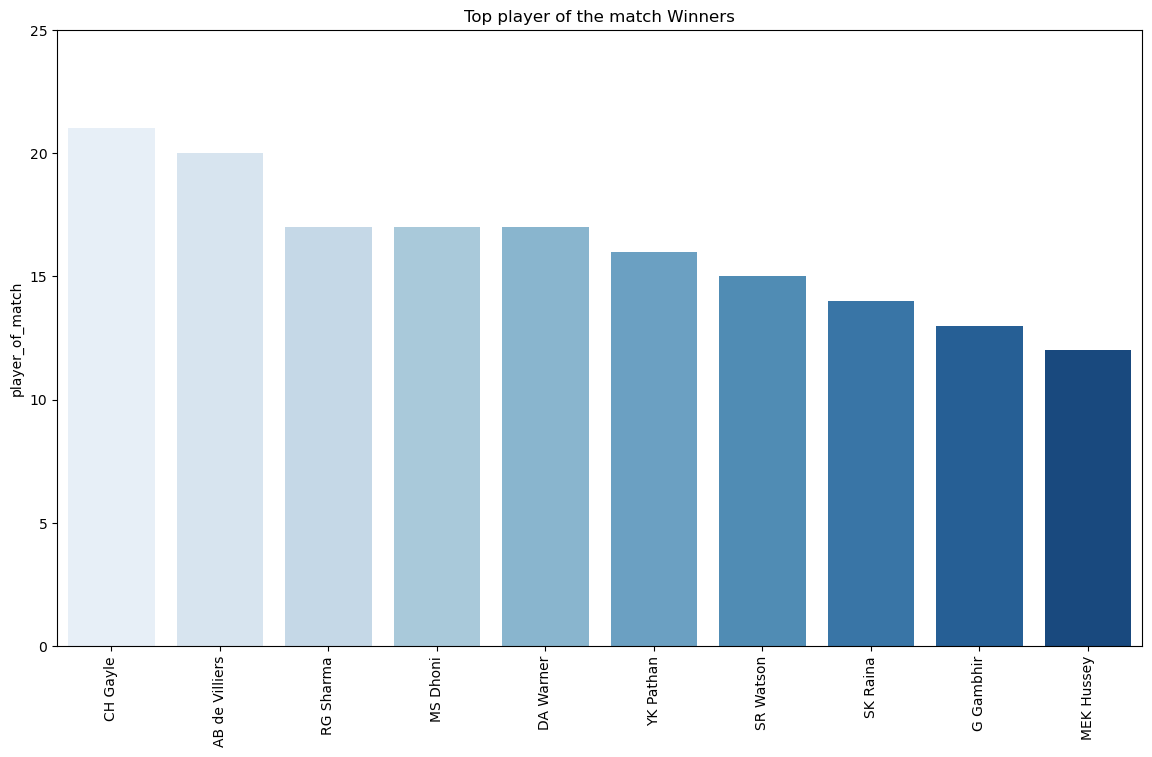

In [16]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylim([0,25])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

CH Gayle is the most Successful player in all match winners

## Number of matches in each venue:

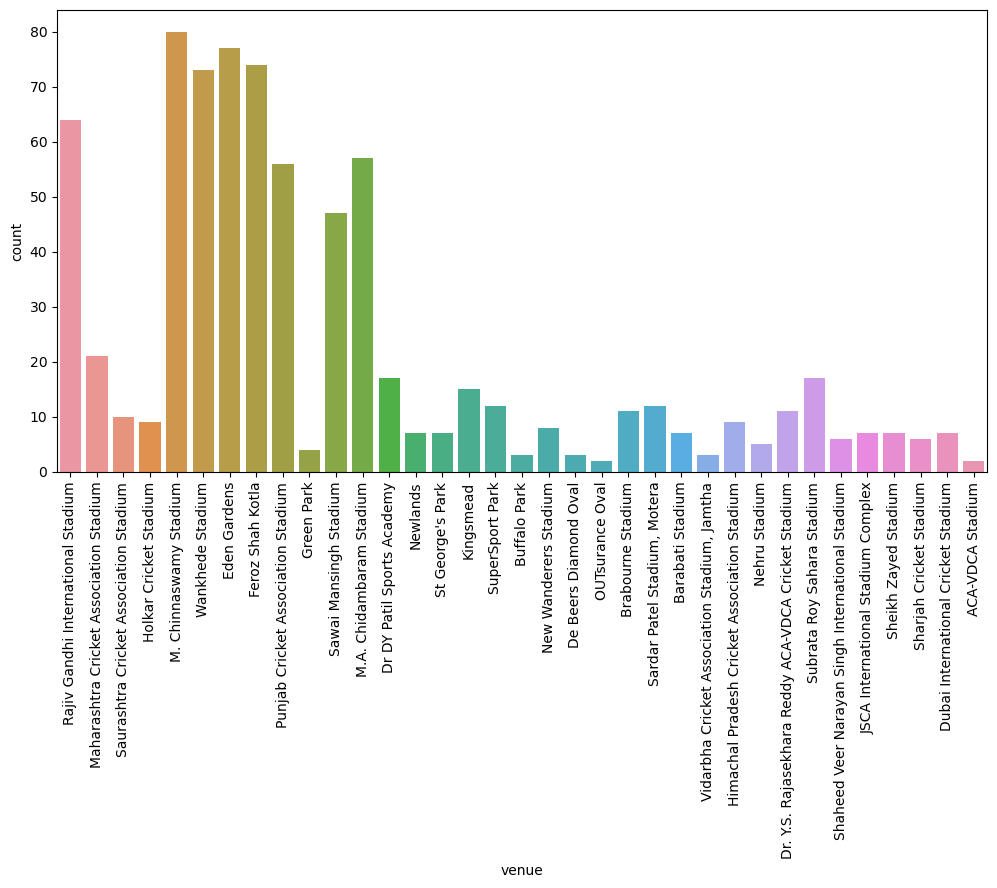

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

There are quite a few venues present in the data with "M Chinnaswamy Stadium" being the one with most number of matches followed by  "Eden Gardens" and "Feroz Shah Kotla"

## Number of matches played by each team:

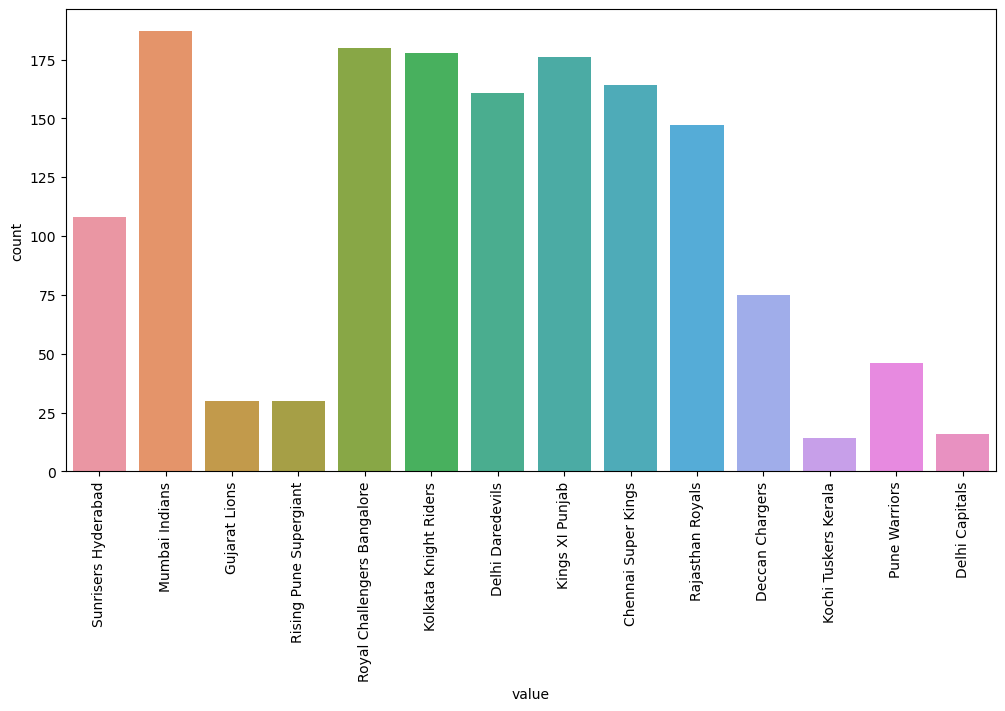

In [18]:
temp_df = pd.melt(matches_df, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

 "Mumbai Indians" lead the pack with most number of matches played followed by "Royal Challengers Bangalore". There are also teams with very few matches like 'Delhi Capitals' and 'Kochi Tuskers Kerala'.

## Number of wins per team:

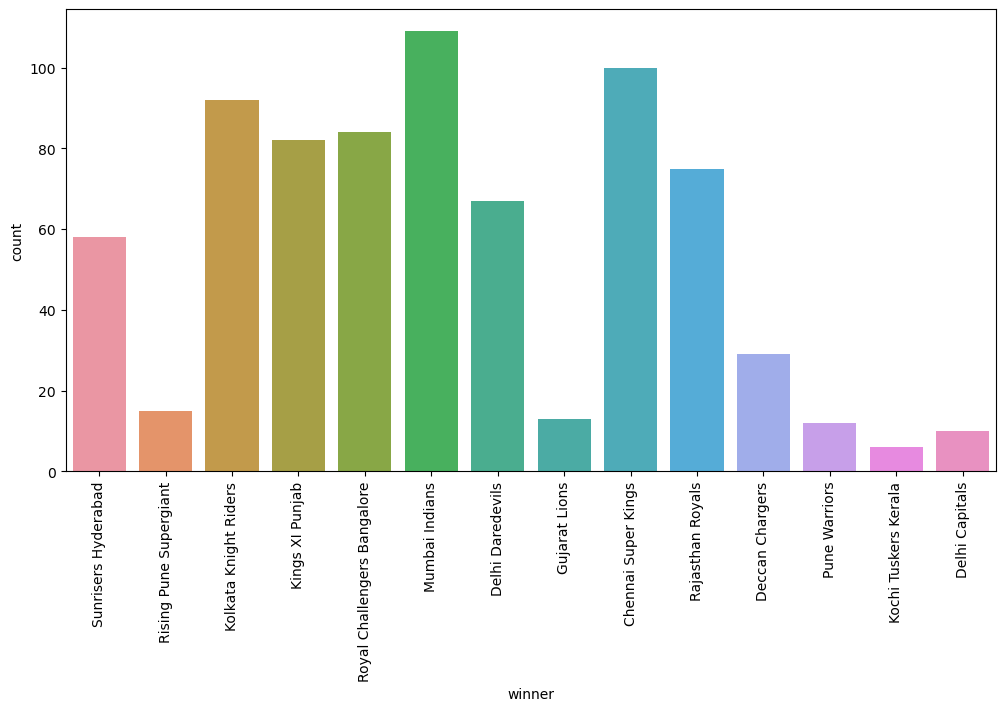

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=matches_df)
plt.xticks(rotation=90)
plt.show()

MI again leads the pack followed by CSK.

### Champions each season:

Now let us see the champions in each season.

In [20]:
temp_df = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

season                 winner
0     2017         Mumbai Indians
1     2008       Rajasthan Royals
2     2009        Deccan Chargers
3     2010    Chennai Super Kings
4     2011    Chennai Super Kings
5     2012  Kolkata Knight Riders
6     2013         Mumbai Indians
7     2014  Kolkata Knight Riders
8     2015         Mumbai Indians
9     2016    Sunrisers Hyderabad
10    2018    Chennai Super Kings
11    2019         Mumbai Indians

## Toss decision:

Let us see the toss decisions taken so far.

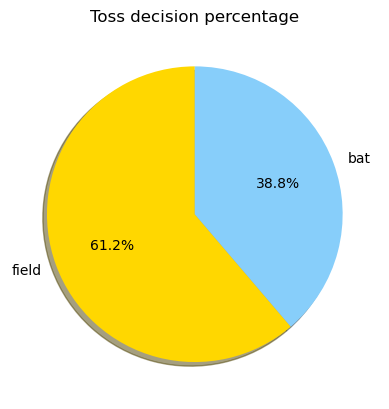

In [21]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

Almost 61% of the toss decisions are made to field first. Now let us see how this decision varied over time.

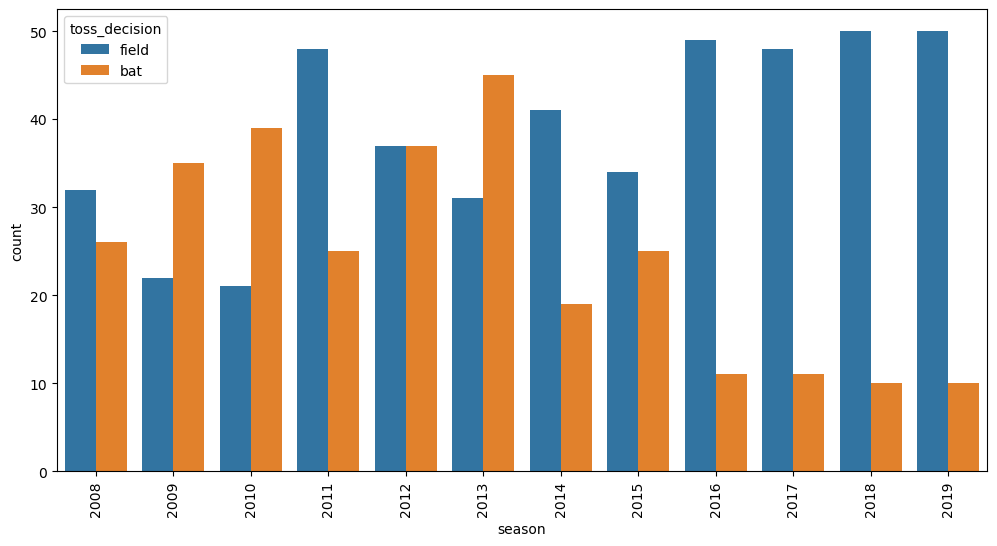

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

It seems during some of the initial years, teams wanted to bat first. But from 2016 season, most of the toss decisions are to field first.

# Does toss winning affects the match winner 

In [23]:

trace1 = go.Bar(x=matches_df["winner"].value_counts().index, y=matches_df["winner"].value_counts().values,name="match win")
trace2 = go.Bar(x=matches_df["toss_winner"].value_counts().index, y=matches_df["toss_winner"].value_counts().values,name="toss win")

# Fill out  data with our traces
data = [trace1, trace2]
# Create layout and specify title, legend and so on


layout = go.Layout(title="Total number of wins for every team till 2020",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"),
                   legend=dict(x=1.0, y=0.5)
                   ,barmode="group")


# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

#  win percentage of teams batting second.

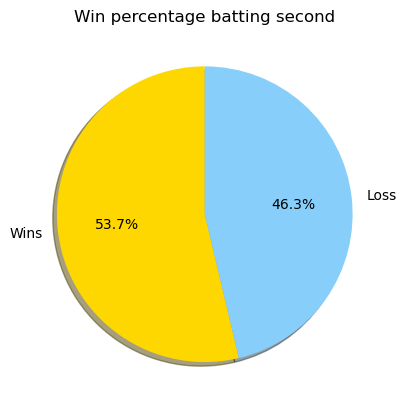

In [24]:
# Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.

num_of_wins = (matches_df.win_by_wickets>0).sum()
num_of_loss = (matches_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

# Success rate of winning matches

In [25]:

matches_won = matches_df.groupby('winner').count()
total_matches = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()

matches_won['Total matches'] = total_matches
win_df = matches_won[["Total matches","result"]]
success_ratio = round((matches_won['id']/total_matches),4)*100
success_ratio_sort = success_ratio.sort_values(ascending = False)

data = [go.Bar(
    x = success_ratio_sort.index,
    y = success_ratio_sort.values,
    marker = dict(color = 'lightblue',line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Success rate of Teams",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Success rate of wining"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

So percentage of times teams batting second has won is 53.7.

## Top players of the match:

In [26]:
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

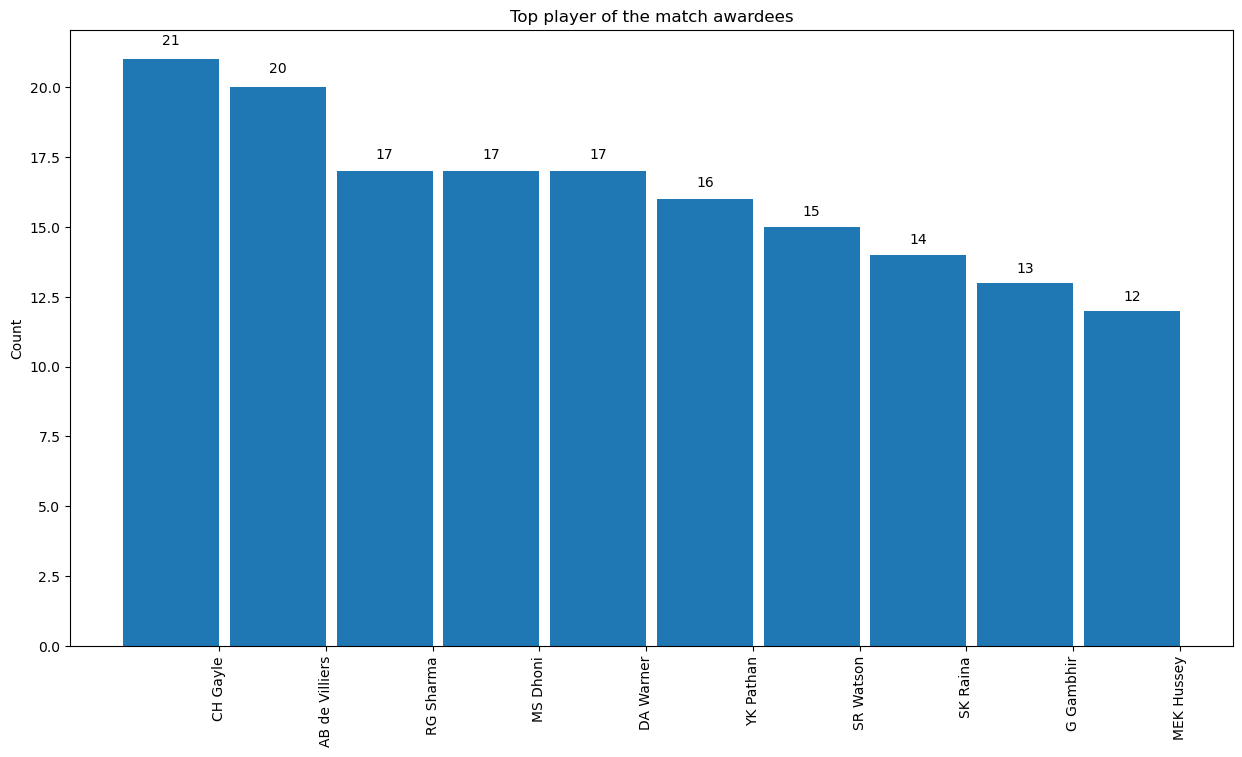

In [27]:
temp_series = matches_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

CH Gayle is the top player of the match awardee in all the seasons of IPL.

## Top Umpires:

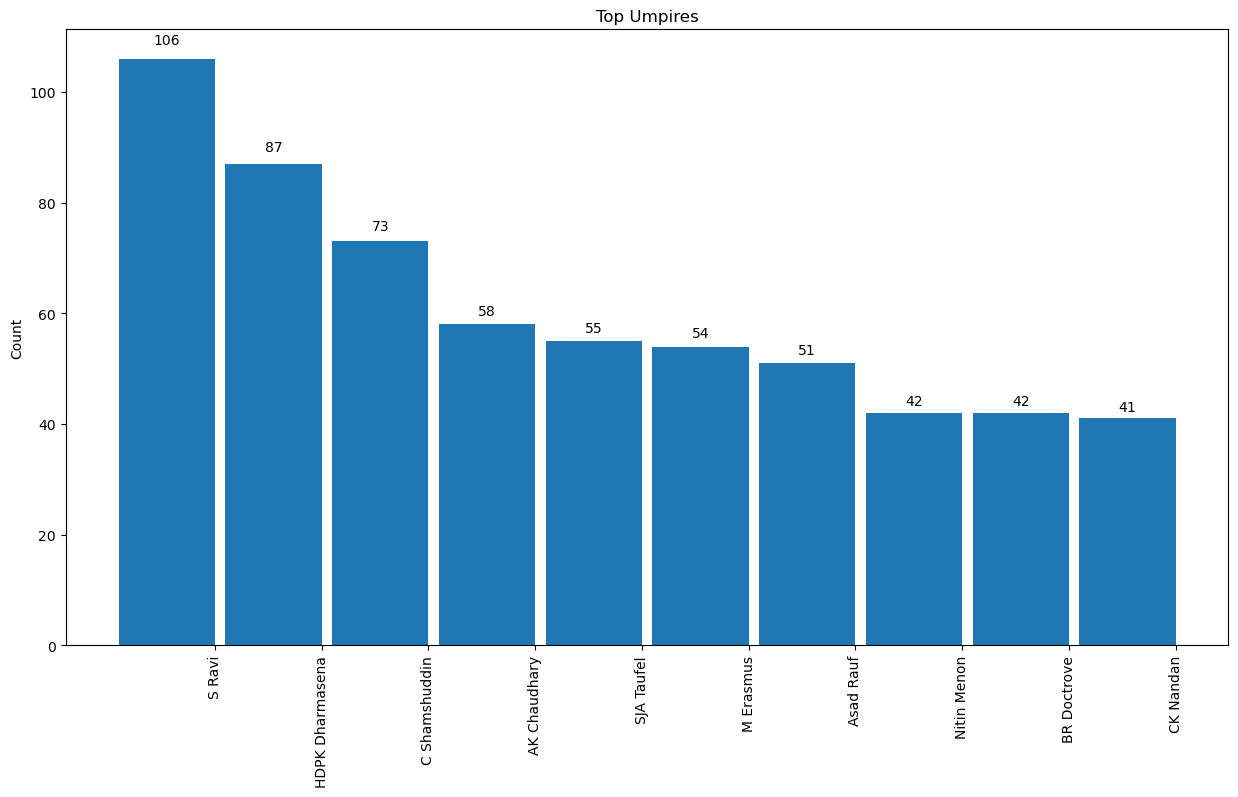

In [28]:
temp_df = pd.melt(matches_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width,)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

Ravi seems to be the most sought after umpire for IPL matches followed by Dharmasena. 

## Score Data Set

In [29]:
score_df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

## Batsman analysis:

Let's start our analysis with batsman. Let's first see the ones with most number of IPL runs under their belt.

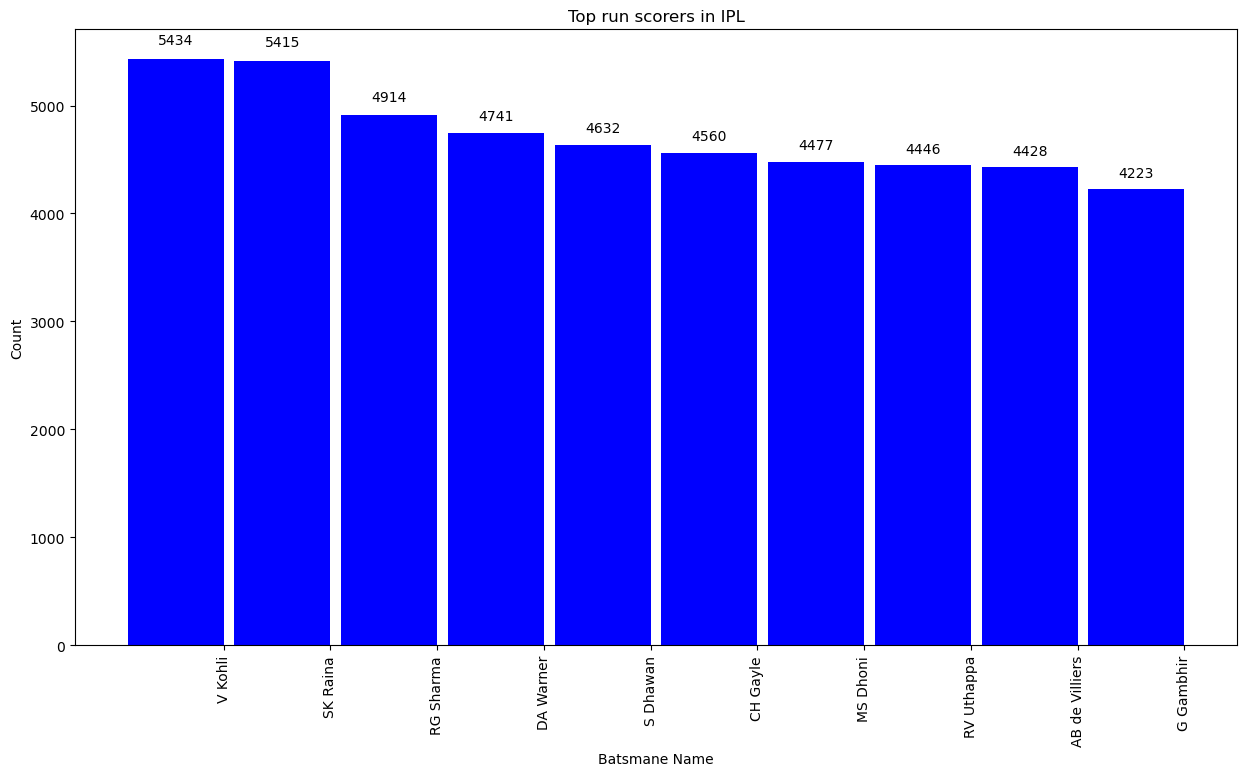

In [30]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

  Virat Kohli is leading the chart followed closely by SK Raina.

# Now let us see the players with more number of boundaries in IPL.

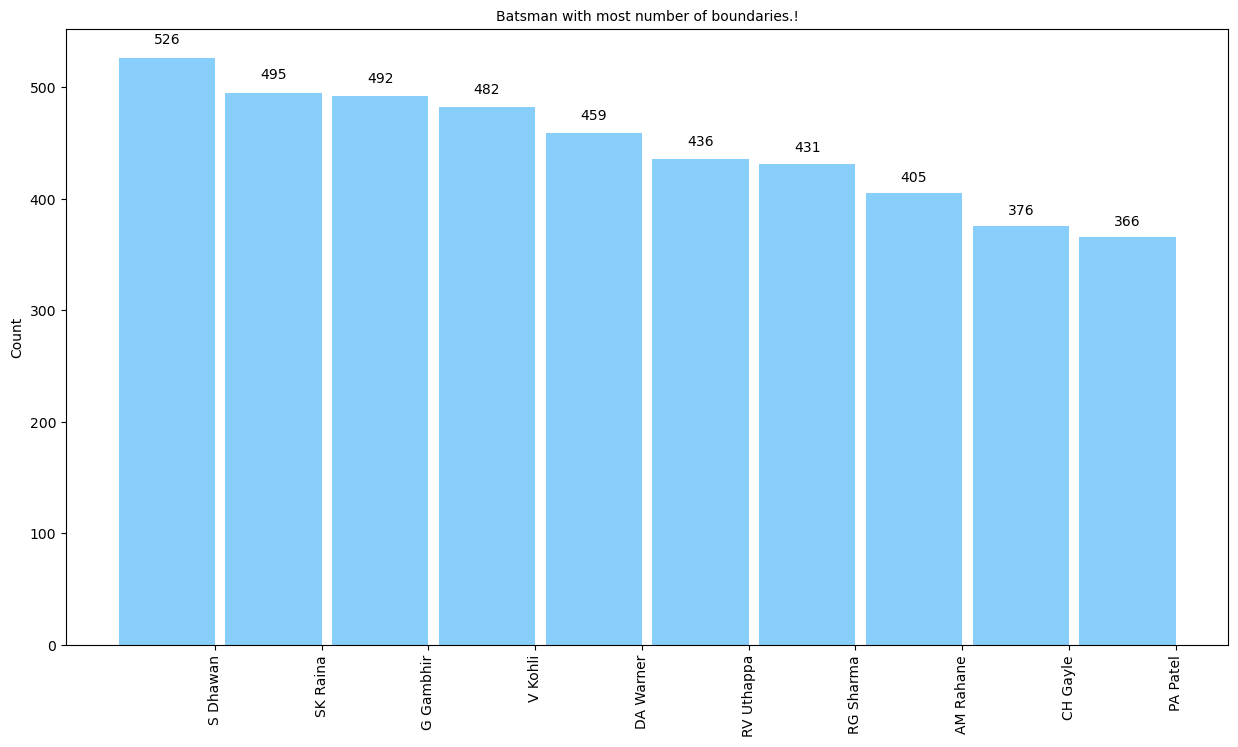

In [31]:


temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
autolabel(rects)
plt.show()

# Now let us check the number of 6's

S Dhawan is leading the chart. Raina ,Gambhir and Kohli are almost same. 

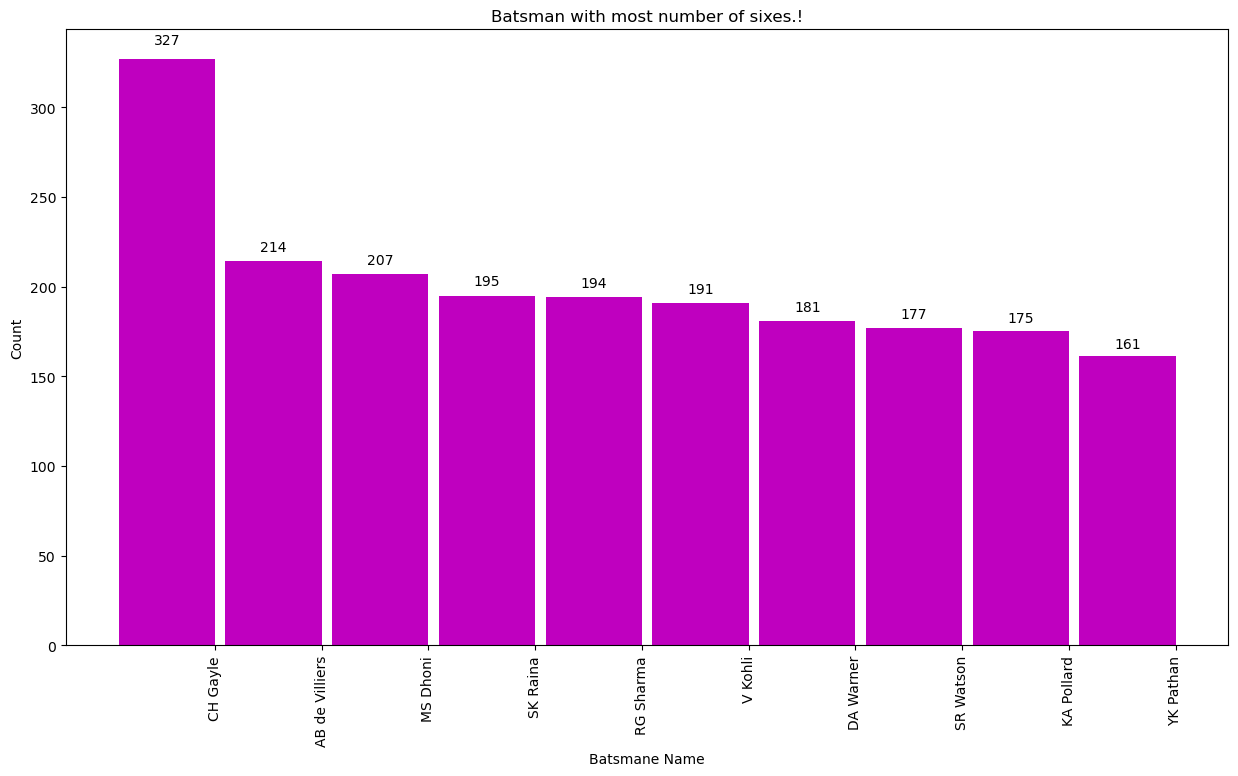

In [32]:


temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

CH Gayle is way ahead of others.



# Now let us see the batsman who has played the most number of dot balls.

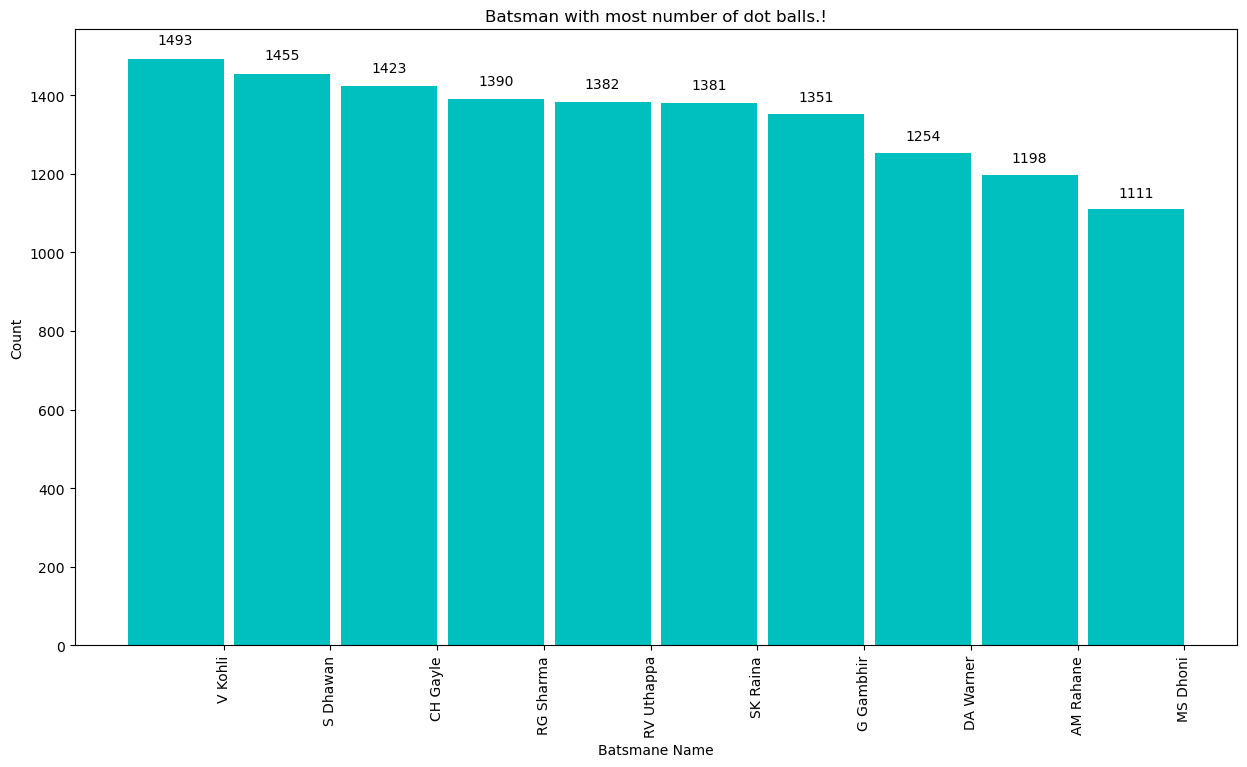

In [33]:


temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

# Let us check the percentage distribution now.

C:\Users\hp\AppData\Local\Temp\ipykernel_10080\2062496339.py:27: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



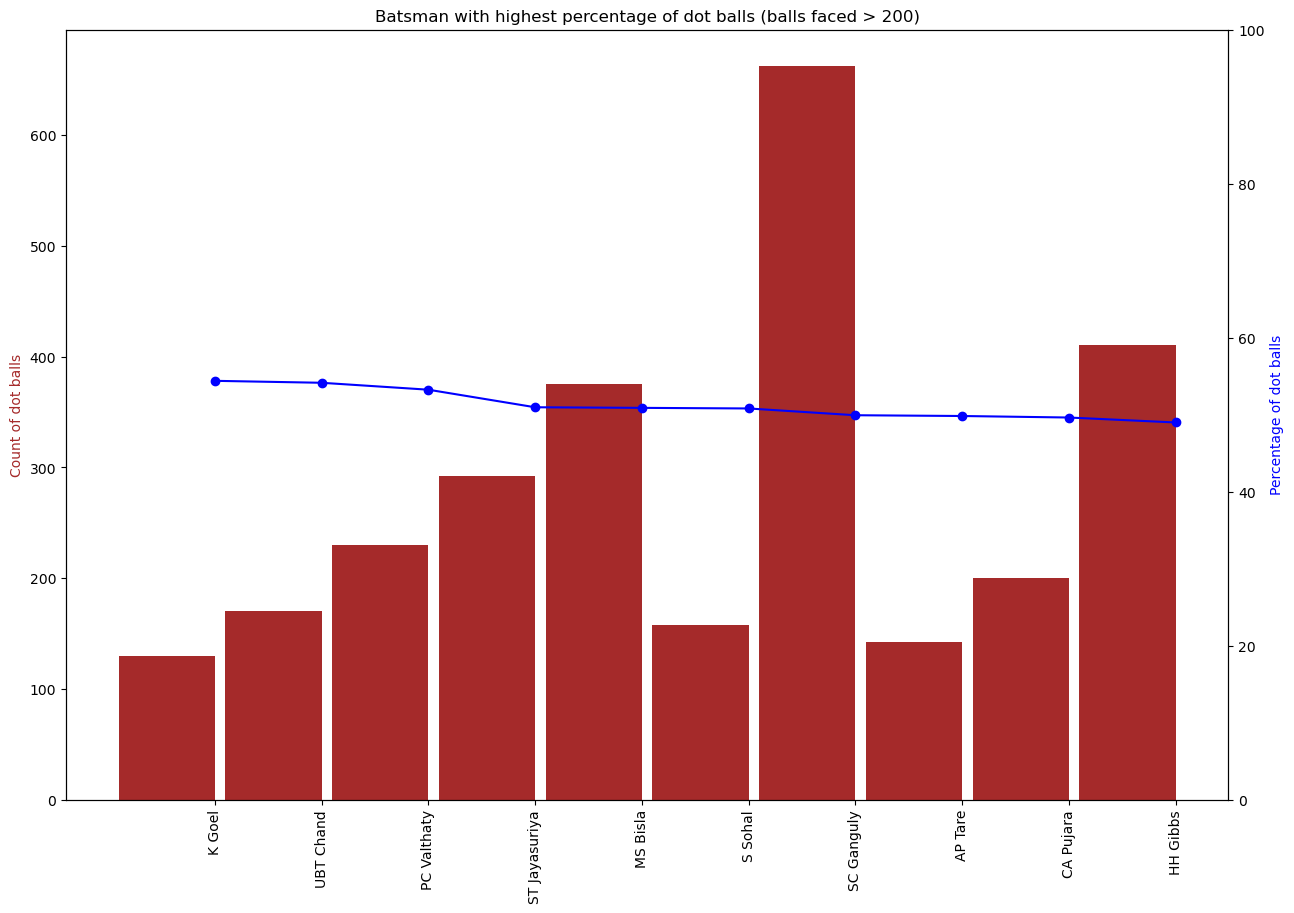

In [34]:


def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = score_df.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]


fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

Batsman with more than 200 balls faced in taken and the ones with higher percentage of dot balls are seen. It is interesting to see Ganguly with more than 1000 balls and nearly half of them are dot balls.

## Bowler Analysis

Now let's see the bowlers who has bowled most number of balls in IPL.

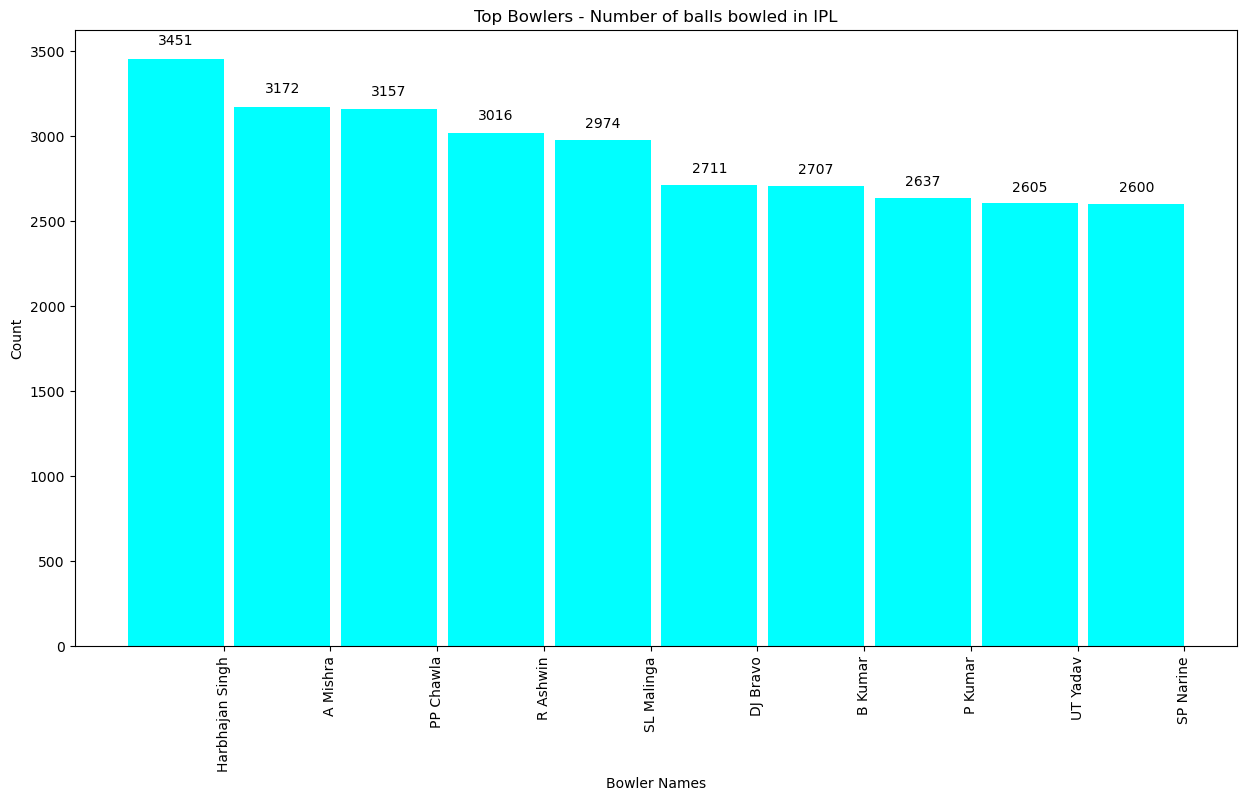

In [35]:
temp_df = score_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches. 

 Now let us see the bowler with most number of dot balls.

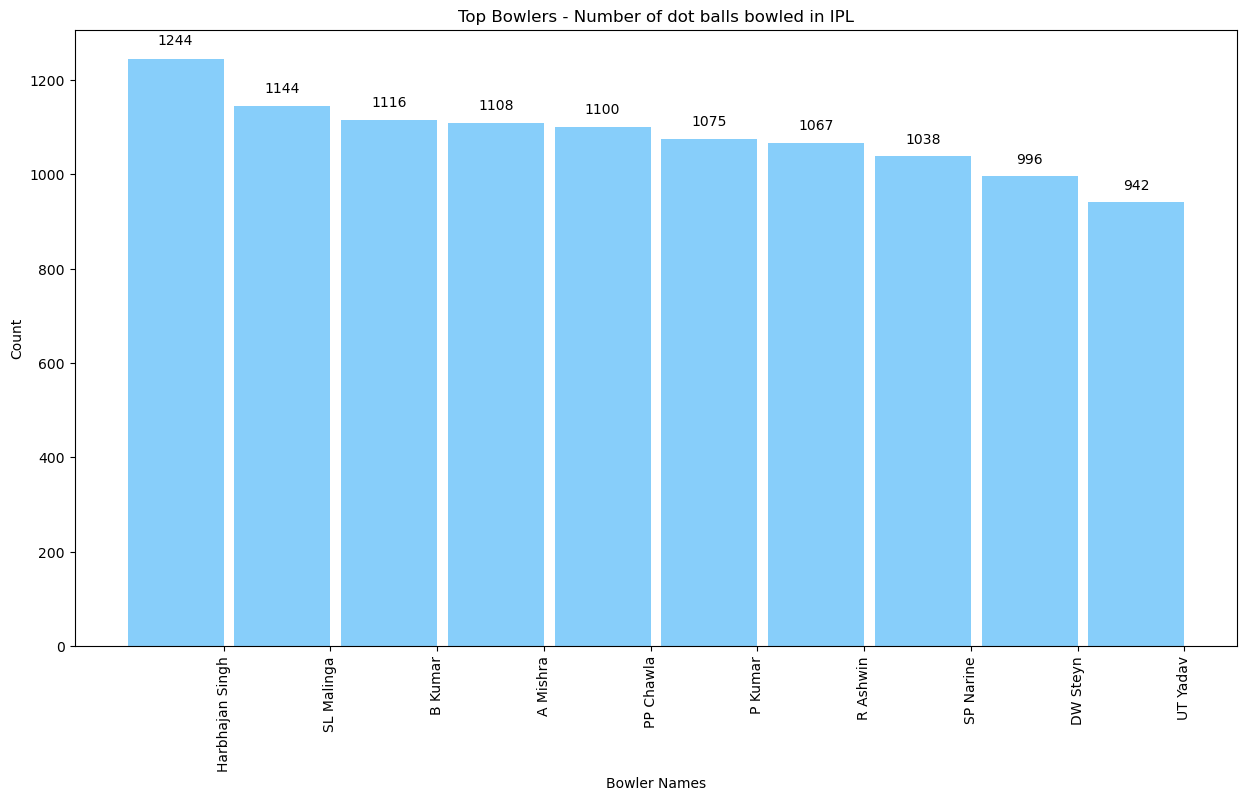

In [36]:
temp_df = score_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

Harbhajan Singh is the one with more number of dot balls followed by SL Malinga and B Kumar

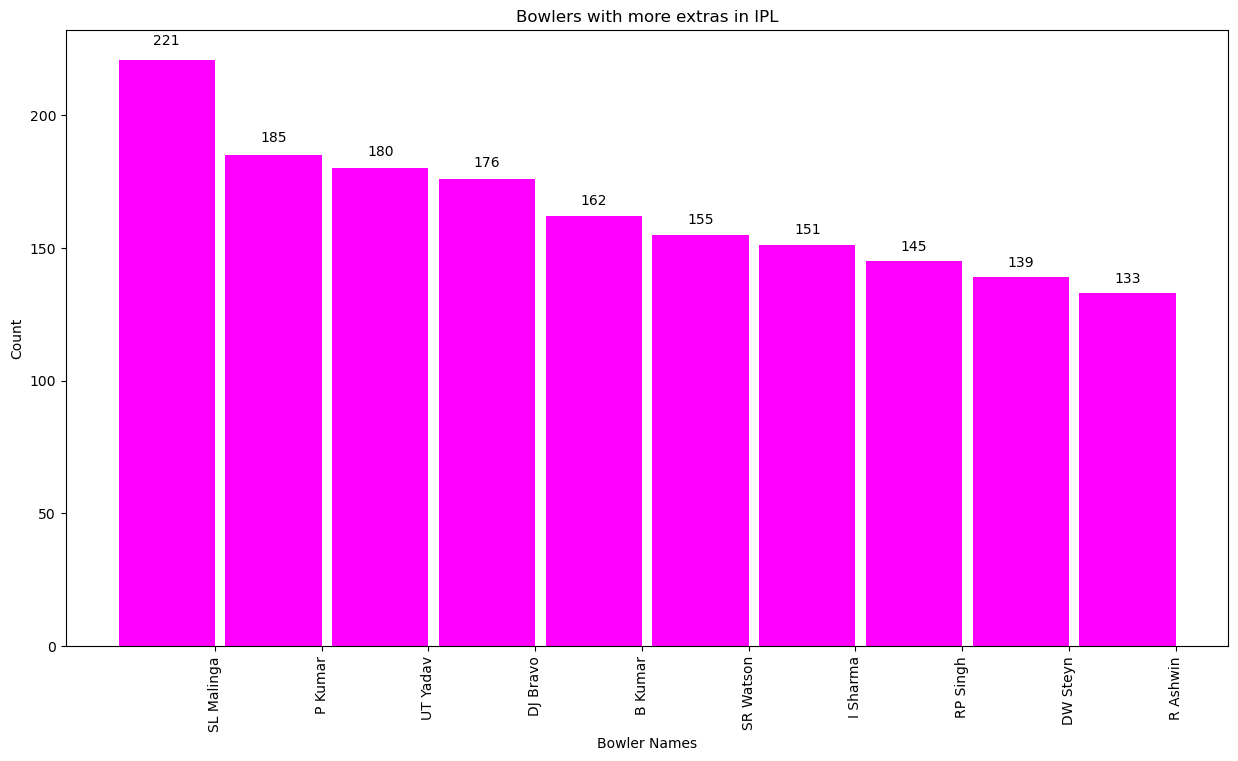

In [37]:
# Now let us see the bowlers who has bowled more number of extras in IPL.

temp_df = score_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

Malinga tops the chart with 221 extra runs followed by Pravin Kumar.

# Top 10 bowlers

In [38]:

bowling_wickets=score_df[score_df['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

trace1 = go.Scatter(
    x = top_bowlers['bowler'].values,
    y = top_bowlers['Wickets'].values,
    mode = 'lines+markers',
)

layout = go.Layout(title="Top 10 Bowlers in IPL- Seasons 2008-2019",
                   xaxis=dict(title="TOP 10 Bowlers"),
                   yaxis=dict(title="Wickets Taken"))


# Fill out  data with our traces
data = [trace1]

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

# Top 10 Bowling Performance till 2020

In [39]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
match_bowling_tot=bowling_wickets.groupby(['match_id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['match_id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['match_id','bowler','Wickets']][0:10] 
match_bowling_runs=score_df.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,score_df,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']


trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'markers',
    name="Wickets"
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name="Run Per Wicket"
)

layout = go.Layout(title="IPL Best bowling performances in a Match",
                   xaxis=dict(title="Top Bowlers"),
                   yaxis=dict(title="Runs per Wicket/Wickets"))


# Fill out  data with our traces
data = [trace1, trace2]

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

# Top 10 Best Fielders in the Field

In [40]:
data = [go.Bar(
    x =score_df["fielder"].value_counts().index[:10],
    y = score_df["fielder"].value_counts().values[:10],
    marker = dict(color = 'lightblue',line=dict(color='#000000', width=1))
)]

layout = go.Layout(
   {
      "title":"Top 10 Best Fielders in the Field ",
   }
)
fig = go.Figure(data=data,layout = layout)
iplot(fig)

# Most common dismissal types in IPL.

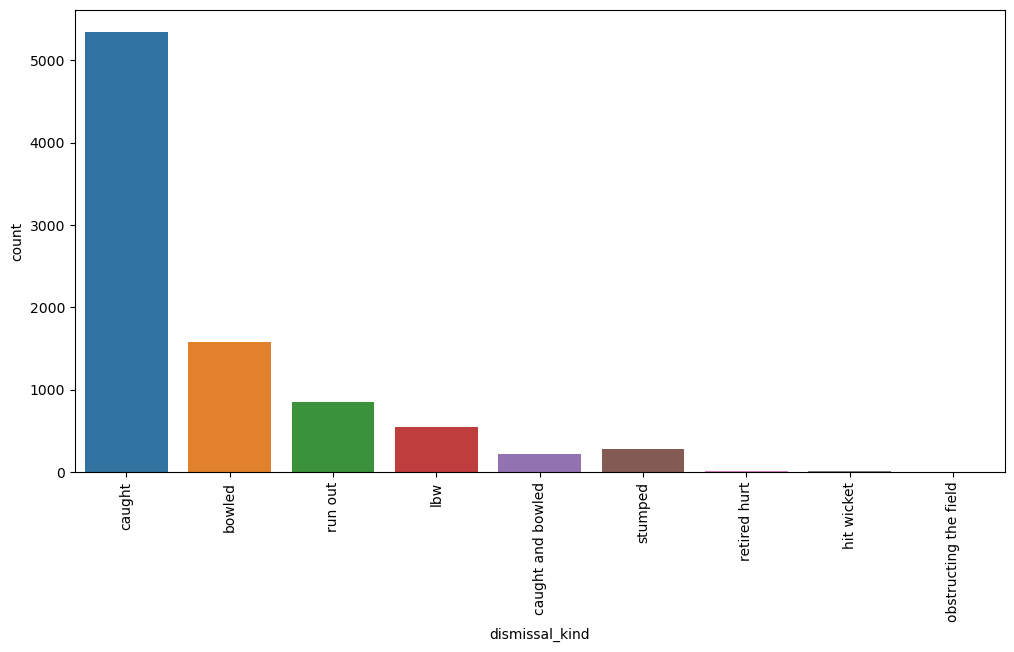

In [41]:


plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()

Caught is the most common dismissal type in IPL followed by Bowled. There are very few instances of hit wicket as well. 